# PCA

In [1]:
 #Dummy Data Set
    
import pandas as pd
import numpy as np
df=pd.DataFrame({'age':[2,4,6] , 'height':[20,40,60], 'wts':[32,34,38],'gender':['M','F','M']})
df

    

,age,height,wts,gender
0,2,20,32,M
1,4,40,34,F
2,6,60,38,M


In [2]:
#Predict the gender using other column:

In [3]:
X=df[['age','height','wts']]

#calculating the eign value and eigen vector


evalue,evector=np.linalg.eig(X)
print(evalue)

[ 8.72863617e+01 -1.74814387e-15 -7.28636167e+00]


In [4]:
print(evector)

[[-4.03094953e-01 -9.95037190e-01 -8.99274765e-01]
 [-5.56486180e-01  9.95037190e-02 -2.02633096e-01]
 [-7.26524322e-01  2.31320866e-16  3.87614145e-01]]


In [5]:
pcs=np.dot(X,evector)
pcs

array([[-3.51846918e+01,  6.29204470e-15,  6.55244118e+00],
       [-4.85736540e+01,  5.64446341e-15,  1.47645802e+00],
       [-6.34156648e+01,  5.23747924e-15, -2.82429685e+00]])

In [9]:
#Converting into data Frame
pcs_df = pd.DataFrame(pcs)
pcs_df

,0,1,2
0,-35.184692,6.292045e-15,6.552441
1,-48.573654,5.644463e-15,1.476458
2,-63.415665,5.237479e-15,-2.824297


In [11]:
#Calculate the information given by each PC
var_of_each_pc = pd.DataFrame(pcs_df.var())

var_of_each_pc

Total_var=pcs_df.var().sum()


#Percentage information of each PCs

var_of_each_pc['Percentage'] = (round((var_of_each_pc[0]/Total_var),2)*100)

var_of_each_pc

,0,Percentage
0,1.994229e+02,90.0
1,2.828510e-31,0.0
2,2.203089e+01,10.0


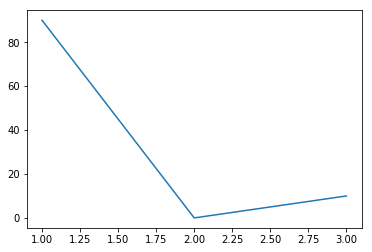

In [14]:
import matplotlib.pyplot as plt
x_axis = [1,2,3]

y_axis = var_of_each_pc['Percentage']

plt.plot(x_axis,y_axis)

In [16]:
from pydataset import data

In [ ]:
#Step to Follow

In [17]:
iris=data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [19]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
X = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
Y=iris[['Species']] #my target variable

In [23]:
list(iris)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [24]:
#Splitting the data into training as testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(120, 30, 120, 30)

In [31]:
# Standarized the data

from sklearn.preprocessing import StandardScaler

#create a standarized object 

sc1=StandardScaler()



In [32]:
#Fit this object on my test and training data

X_train1 = sc1.fit_transform(X_train)
X_test1 = sc1.transform(X_test)

In [39]:
#Creating the Model

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

#Fitting the object on training data

model1=classifier.fit(X_train1,Y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [43]:
#Predicting on test data
Y_test['Pred_Species'] = model1.predict(X_test1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
Y_test.head()

,Species,Pred_Species
74,versicolor,versicolor
36,setosa,setosa
119,virginica,virginica
14,setosa,setosa
81,versicolor,versicolor


In [49]:
pd.crosstab(Y_test.Species,Y_test.Pred_Species)

Pred_Species,setosa,versicolor,virginica
Species,,,
setosa,13,0,0
versicolor,0,8,1
virginica,0,0,8


In [50]:
Accuracy=y=(13+8+8)/30
Accuracy

0.9666666666666667

In [5]:


Accuracy1=(12/16)
Accuracy1


0.75